# Titanic - Machine Learning from Disaster

## Binary Classification via Logistic Regression

#### Libraries Used

In [1]:
library(ggplot2)   #for plots
library(dplyr)     #for data cleaning and manipulation
library(Amelia)    #for missing data checking


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Loading required package: Rcpp

## 
## Amelia II: Multiple Imputation
## (Version 1.8.0, built: 2021-05-26)
## Copyright (C) 2005-2021 James Honaker, Gary King and Matthew Blackwell
## Refer to http://gking.harvard.edu/amelia/ for more information
## 



#### Importing of Data

In [2]:
df.train<-read.csv('train.csv')
head(df.train)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
,<int>,<int>,<int>,<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<dbl>,<chr>,<chr>
1,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,,S
2,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C
3,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,,S
4,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
5,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,,S
6,6,0,3,"Moran, Mr. James",male,NA,0,0,330877,8.4583,,Q


In [3]:
str(df.train)

'data.frame':	891 obs. of  12 variables:
 $ PassengerId: int  1 2 3 4 5 6 7 8 9 10 ...
 $ Survived   : int  0 1 1 1 0 0 0 0 1 1 ...
 $ Pclass     : int  3 1 3 1 3 3 1 3 3 2 ...
 $ Name       : chr  "Braund, Mr. Owen Harris" "Cumings, Mrs. John Bradley (Florence Briggs Thayer)" "Heikkinen, Miss. Laina" "Futrelle, Mrs. Jacques Heath (Lily May Peel)" ...
 $ Sex        : chr  "male" "female" "female" "female" ...
 $ Age        : num  22 38 26 35 35 NA 54 2 27 14 ...
 $ SibSp      : int  1 1 0 1 0 0 0 3 0 1 ...
 $ Parch      : int  0 0 0 0 0 0 0 1 2 0 ...
 $ Ticket     : chr  "A/5 21171" "PC 17599" "STON/O2. 3101282" "113803" ...
 $ Fare       : num  7.25 71.28 7.92 53.1 8.05 ...
 $ Cabin      : chr  "" "C85" "" "C123" ...
 $ Embarked   : chr  "S" "C" "S" "S" ...


#### Checking for Missing data

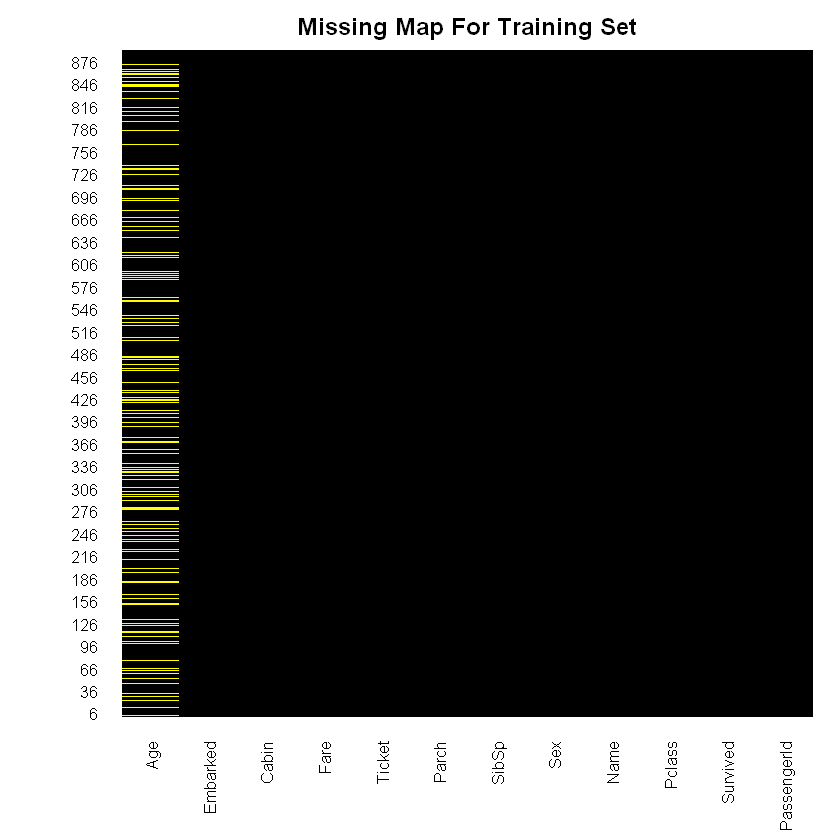

In [4]:
missmap(df.train,main = 'Missing Map For Training Set',col = c('yellow','black'),legend = F)

Here, we can see that there are lot of missing data in the Age feature (missing datas plotted in yellow), so we will need to impute the missing values.

#### Exploratory Data Analysis

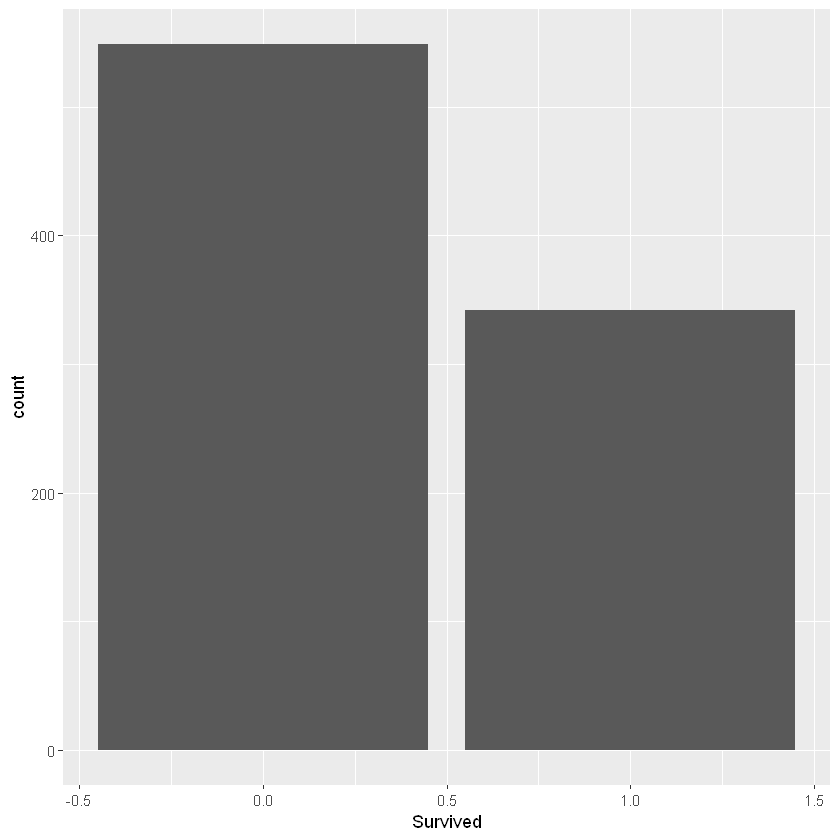

In [5]:
ggplot(df.train,aes(Survived))+geom_bar()

So, here we can see, significantly more people did not survive the incident.

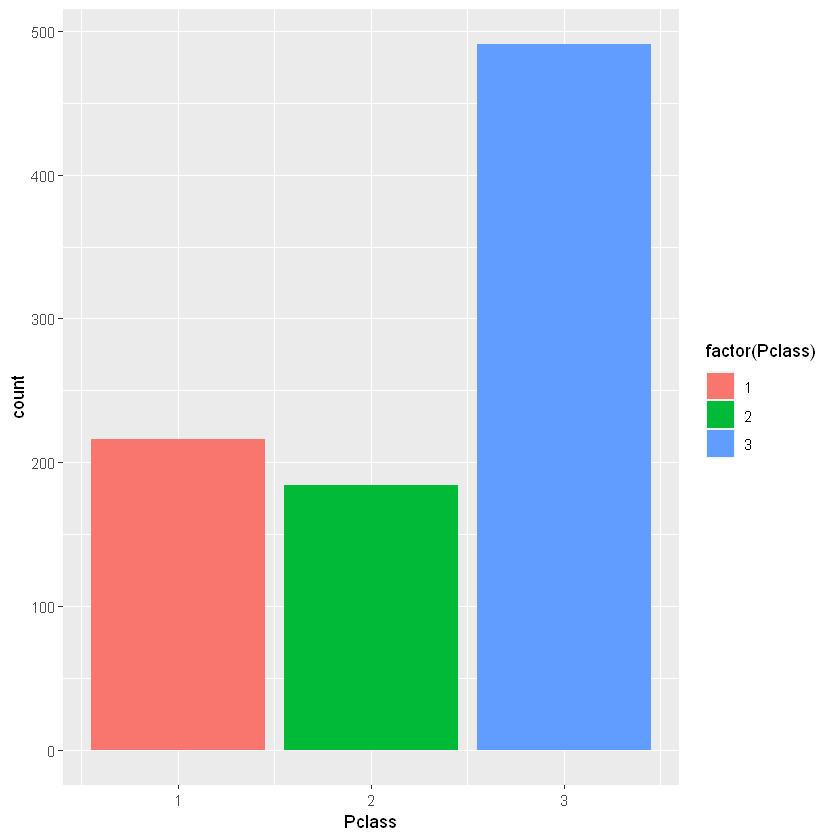

In [6]:
ggplot(df.train,aes(Pclass))+geom_bar(aes(fill=factor(Pclass)))

So, we can see, by far there are more third class passengers than there are first or second class passengers.

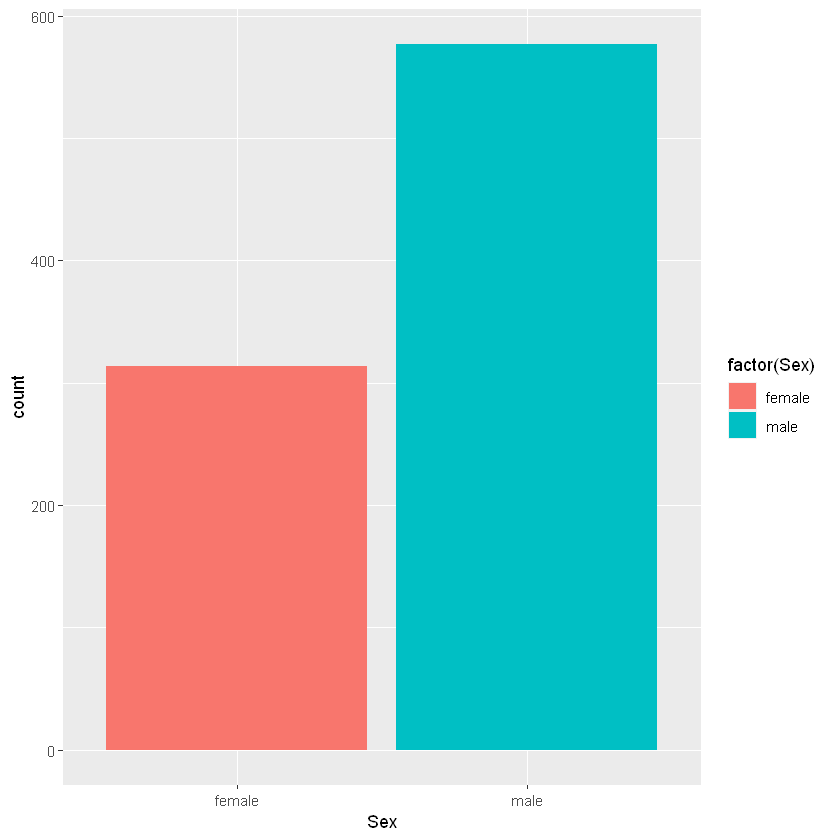

In [7]:
ggplot(df.train,aes(Sex))+geom_bar(aes(fill=factor(Sex)))

We find, that there were almost double the number of males onboard compared to number of females.

Warning message:
"Removed 177 rows containing non-finite values (stat_bin)."


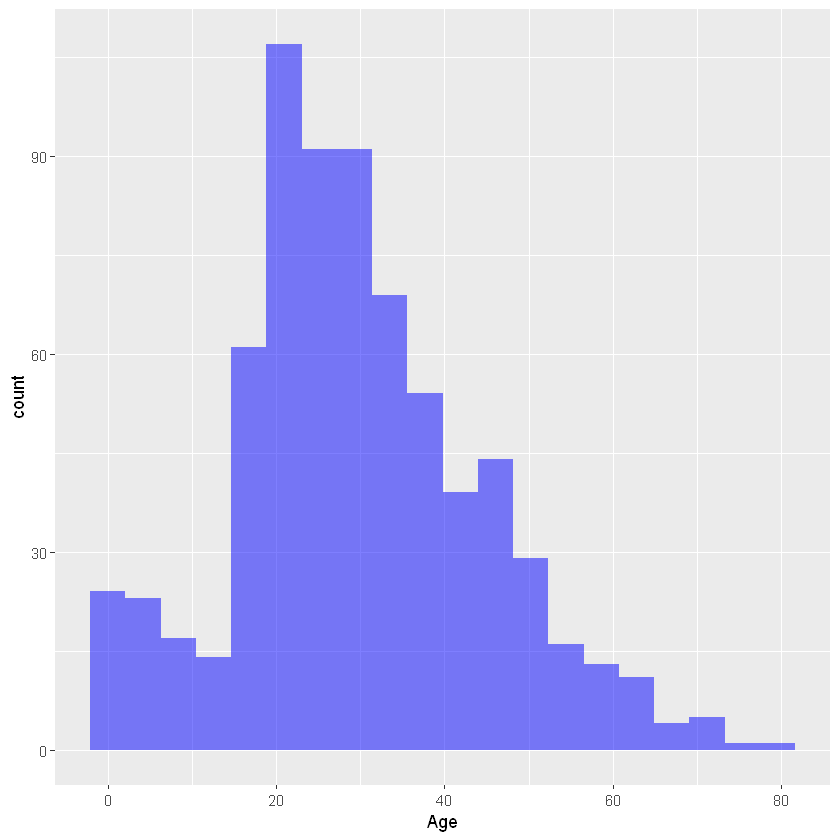

In [8]:
ggplot(df.train,aes(Age))+geom_histogram(bins = 20,alpha=0.5,fill='blue')

Looks like, most people onboard were between 20-40 years of age. Also quite a few number of children were there too.
We also got a warning for a lot of rown removed, as we previously saw that the Age feature had many values missing.

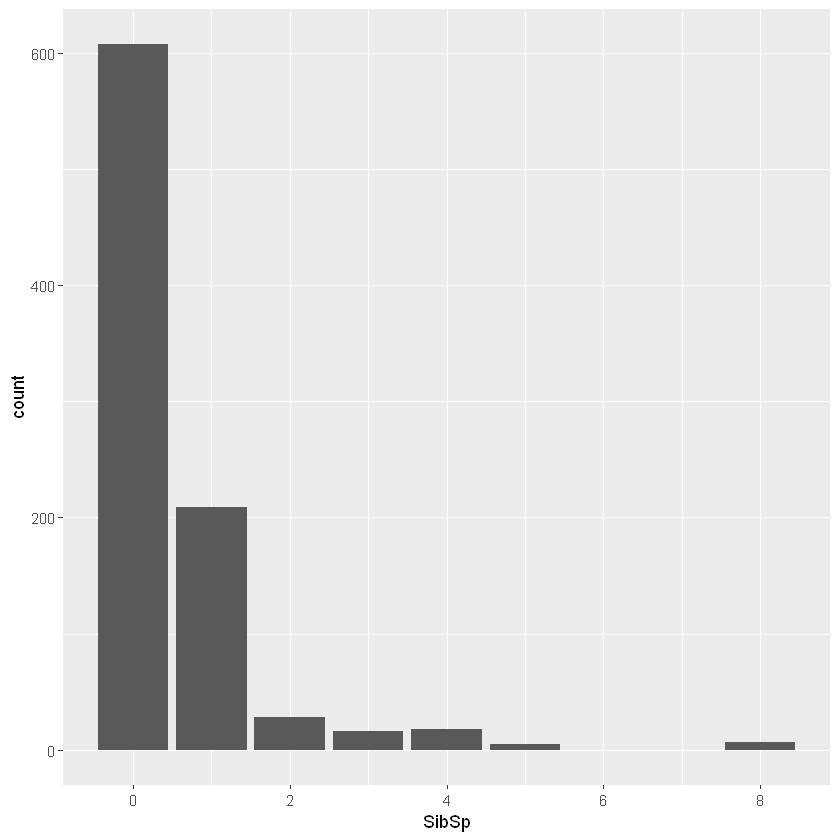

In [9]:
ggplot(df.train,aes(SibSp))+geom_bar()

Looks like majority of people did not have any Siblings and Spouses onboard.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



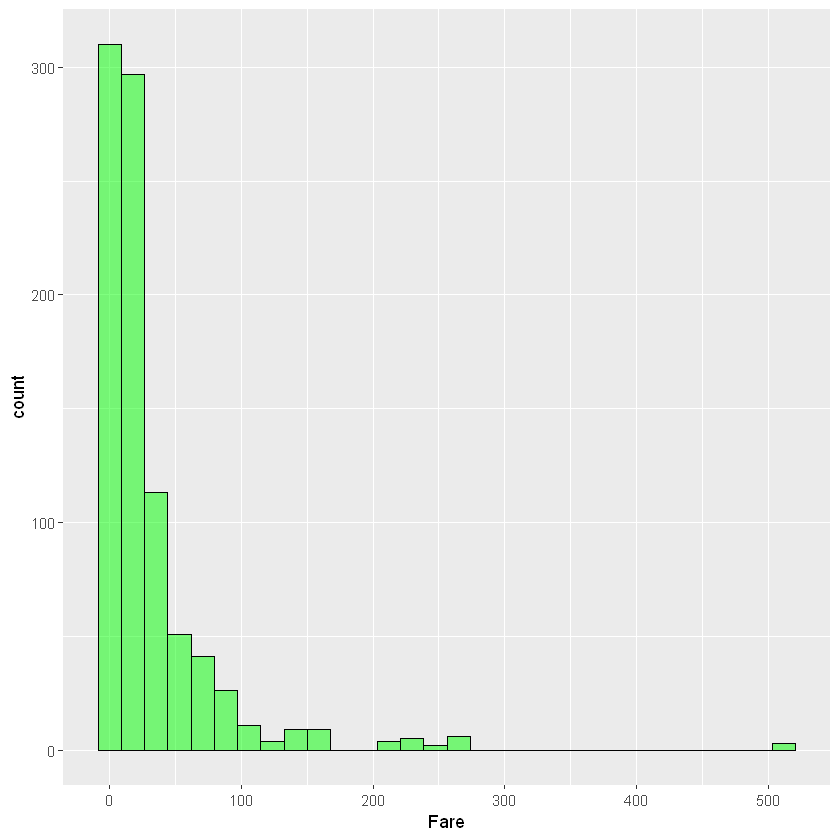

In [10]:
ggplot(df.train,aes(Fare))+geom_histogram(fill='green',color='black',alpha=0.5)

Claearly, most people paid a low fare, which makes sense, as we previously found that most people were third class passengers onboard.

#### Imputation of Missing Data

Warning message:
"Removed 177 rows containing non-finite values (stat_boxplot)."


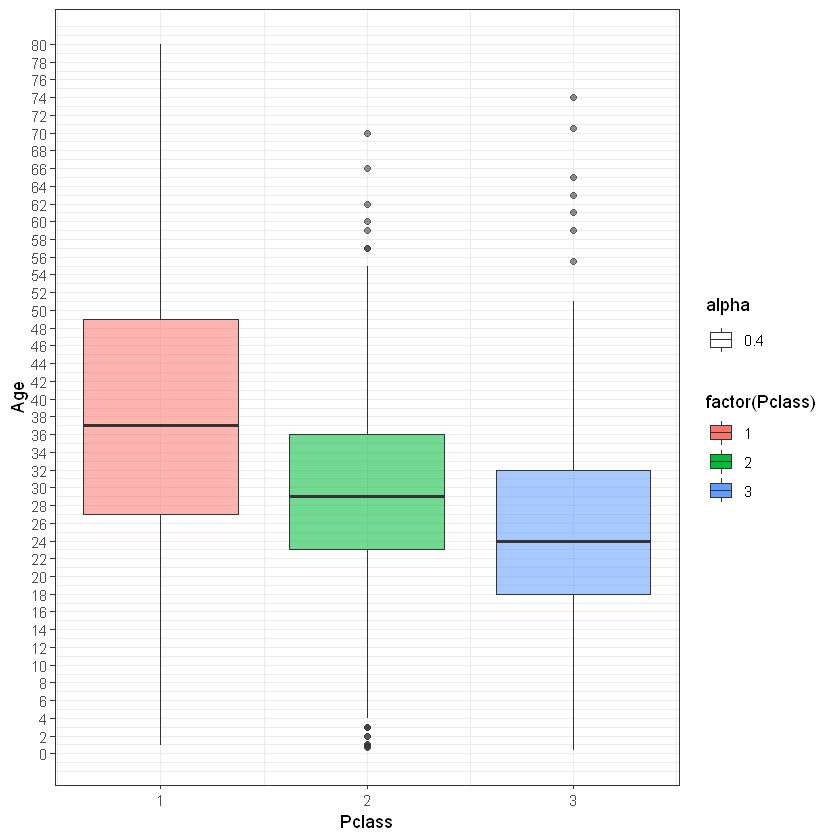

In [11]:
ggplot(df.train,aes(Pclass,Age))+geom_boxplot((aes(group=Pclass,fill=factor(Pclass),alpha=0.4)))+scale_y_continuous(breaks = seq(min(0),max(80),by=2))+theme_bw()

To impute the missing values, we can replace the values by the mean of the available values. But from the boxplot, we can see that, we can do a better job at imputing, if we classify the means according to the class of the passenger and replace the then found values for imputation.

##### Function for imputation

In [12]:
impute<-function(feature,class){
  out<-feature
  for(i in 1:length(feature)){
    if(is.na(feature[i])){
      if(class[i]==1){
        out[i]<-37
      }else if(class[i]==2){
        out[i]<-29
      }else{
        out[i]<-24
      }
    }else{
      out[i]<-feature[i]
    }
  }
  return(out)
}

We create a function for imputing the missing values of a feature. The function takes in a feature and the class of the passenger as the parameters and outputs the estimate for imputation.

In [13]:
fixed.ages.train<-impute(df.train$Age,df.train$Pclass)
df.train$Age<-fixed.ages.train

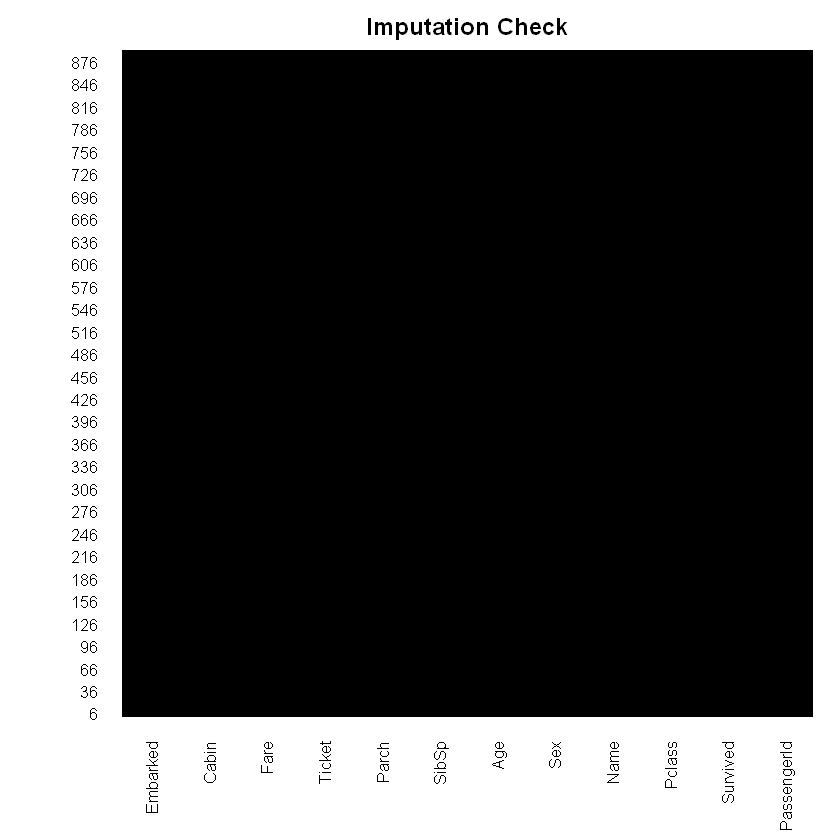

In [14]:
missmap(df.train,main = 'Imputation Check',col = c('Yellow', 'Black'),legend = F)

Now, we can see that there are no missing values in the data and the data is ready for further analysis.

In [15]:
str(df.train)

'data.frame':	891 obs. of  12 variables:
 $ PassengerId: int  1 2 3 4 5 6 7 8 9 10 ...
 $ Survived   : int  0 1 1 1 0 0 0 0 1 1 ...
 $ Pclass     : int  3 1 3 1 3 3 1 3 3 2 ...
 $ Name       : chr  "Braund, Mr. Owen Harris" "Cumings, Mrs. John Bradley (Florence Briggs Thayer)" "Heikkinen, Miss. Laina" "Futrelle, Mrs. Jacques Heath (Lily May Peel)" ...
 $ Sex        : chr  "male" "female" "female" "female" ...
 $ Age        : num  22 38 26 35 35 24 54 2 27 14 ...
 $ SibSp      : int  1 1 0 1 0 0 0 3 0 1 ...
 $ Parch      : int  0 0 0 0 0 0 0 1 2 0 ...
 $ Ticket     : chr  "A/5 21171" "PC 17599" "STON/O2. 3101282" "113803" ...
 $ Fare       : num  7.25 71.28 7.92 53.1 8.05 ...
 $ Cabin      : chr  "" "C85" "" "C123" ...
 $ Embarked   : chr  "S" "C" "S" "S" ...


#### Data Cleaning

In [16]:
df.train<-select(df.train,-PassengerId,-Name,-Ticket,-Cabin)
head(df.train)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
,<int>,<int>,<chr>,<dbl>,<int>,<int>,<dbl>,<chr>
1,0,3,male,22,1,0,7.2500,S
2,1,1,female,38,1,0,71.2833,C
3,1,3,female,26,0,0,7.9250,S
4,1,1,female,35,1,0,53.1000,S
5,0,3,male,35,0,0,8.0500,S
6,0,3,male,24,0,0,8.4583,Q


We remove the fetures that we would not need for training the model.

In [17]:
str(df.train)

'data.frame':	891 obs. of  8 variables:
 $ Survived: int  0 1 1 1 0 0 0 0 1 1 ...
 $ Pclass  : int  3 1 3 1 3 3 1 3 3 2 ...
 $ Sex     : chr  "male" "female" "female" "female" ...
 $ Age     : num  22 38 26 35 35 24 54 2 27 14 ...
 $ SibSp   : int  1 1 0 1 0 0 0 3 0 1 ...
 $ Parch   : int  0 0 0 0 0 0 0 1 2 0 ...
 $ Fare    : num  7.25 71.28 7.92 53.1 8.05 ...
 $ Embarked: chr  "S" "C" "S" "S" ...


We see that some of the features have very few unique values, and hence can be classified as factors.

In [18]:
df.train$Survived<-factor(df.train$Survived)
df.train$Pclass<-factor(df.train$Pclass)
df.train$SibSp<-factor(df.train$SibSp)
df.train$Embarked<-factor(df.train$Embarked)
df.train$Sex<-factor(df.train$Sex)

In [19]:
str(df.train)

'data.frame':	891 obs. of  8 variables:
 $ Survived: Factor w/ 2 levels "0","1": 1 2 2 2 1 1 1 1 2 2 ...
 $ Pclass  : Factor w/ 3 levels "1","2","3": 3 1 3 1 3 3 1 3 3 2 ...
 $ Sex     : Factor w/ 2 levels "female","male": 2 1 1 1 2 2 2 2 1 1 ...
 $ Age     : num  22 38 26 35 35 24 54 2 27 14 ...
 $ SibSp   : Factor w/ 7 levels "0","1","2","3",..: 2 2 1 2 1 1 1 4 1 2 ...
 $ Parch   : int  0 0 0 0 0 0 0 1 2 0 ...
 $ Fare    : num  7.25 71.28 7.92 53.1 8.05 ...
 $ Embarked: Factor w/ 4 levels "","C","Q","S": 4 2 4 4 4 3 4 4 4 2 ...


### Building and training of the model

In [20]:
log.model<-glm(Survived~.,family = binomial(link = 'logit'),data = df.train)
summary(log.model)


Call:
glm(formula = Survived ~ ., family = binomial(link = "logit"), 
    data = df.train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.8282  -0.6001  -0.4117   0.6059   2.5183  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept)  1.866e+01  1.652e+03   0.011 0.990986    
Pclass2     -1.065e+00  3.067e-01  -3.472 0.000517 ***
Pclass3     -2.254e+00  3.121e-01  -7.222 5.11e-13 ***
Sexmale     -2.696e+00  2.039e-01 -13.219  < 2e-16 ***
Age         -4.390e-02  8.411e-03  -5.219 1.79e-07 ***
SibSp1       1.601e-01  2.174e-01   0.736 0.461525    
SibSp2      -1.734e-01  5.202e-01  -0.333 0.738924    
SibSp3      -2.023e+00  7.157e-01  -2.826 0.004709 ** 
SibSp4      -1.462e+00  7.519e-01  -1.944 0.051891 .  
SibSp5      -1.577e+01  9.591e+02  -0.016 0.986880    
SibSp8      -1.586e+01  7.563e+02  -0.021 0.983270    
Parch       -1.049e-01  1.186e-01  -0.885 0.376350    
Fare         2.233e-03  2.417e-03   0.924 0.355529    
EmbarkedC

We can see which features are actually significant in making the prediction. We find that the Sex and Class of the passenger are the two most significant factors respectively.

## Making Predictions on the Test Set

In [21]:
df.test<-read.csv('test.csv')
str(df.test)

'data.frame':	418 obs. of  11 variables:
 $ PassengerId: int  892 893 894 895 896 897 898 899 900 901 ...
 $ Pclass     : int  3 3 2 3 3 3 3 2 3 3 ...
 $ Name       : chr  "Kelly, Mr. James" "Wilkes, Mrs. James (Ellen Needs)" "Myles, Mr. Thomas Francis" "Wirz, Mr. Albert" ...
 $ Sex        : chr  "male" "female" "male" "male" ...
 $ Age        : num  34.5 47 62 27 22 14 30 26 18 21 ...
 $ SibSp      : int  0 1 0 0 1 0 0 1 0 2 ...
 $ Parch      : int  0 0 0 0 1 0 0 1 0 0 ...
 $ Ticket     : chr  "330911" "363272" "240276" "315154" ...
 $ Fare       : num  7.83 7 9.69 8.66 12.29 ...
 $ Cabin      : chr  "" "" "" "" ...
 $ Embarked   : chr  "Q" "S" "Q" "S" ...


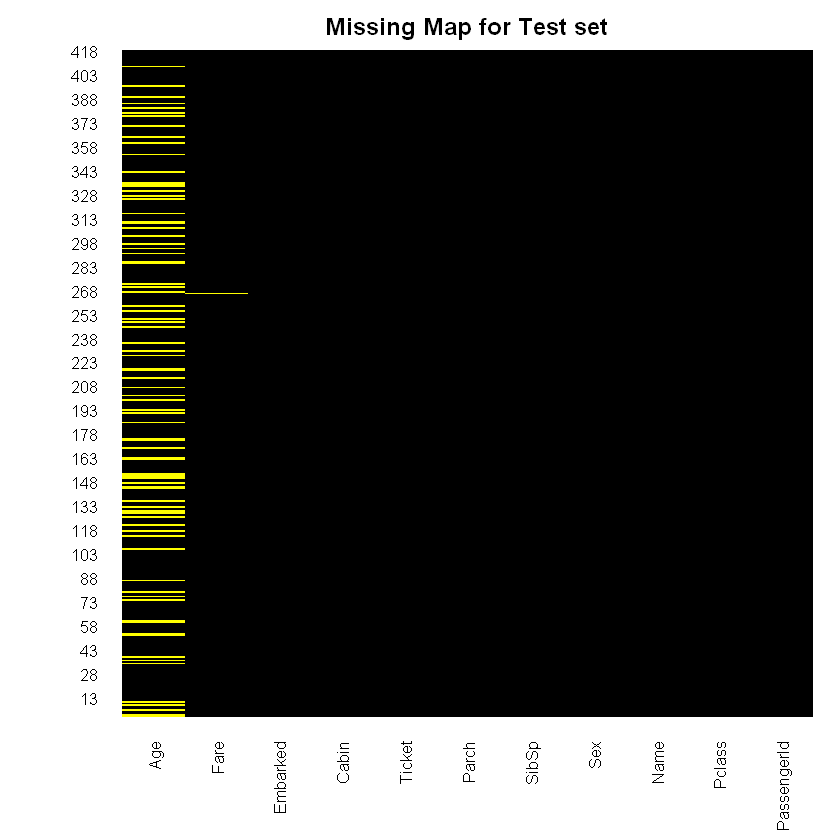

In [22]:
missmap(df.test,main = 'Missing Map for Test set',col = c('yellow','black'),legend = F)

We see that the test set also has a lot of data missing in the Age feature, also we have a data missing in the Fare feature too. So we will need to impute those values using our impute fucntion and clean the test data too in order to make predictions.

In [23]:
fixed.ages.test<-impute(df.test$Age,df.test$Pclass)
df.test$Age<-fixed.ages.test
df.test$Fare<-impute(df.test$Fare,df.test$Pclass)

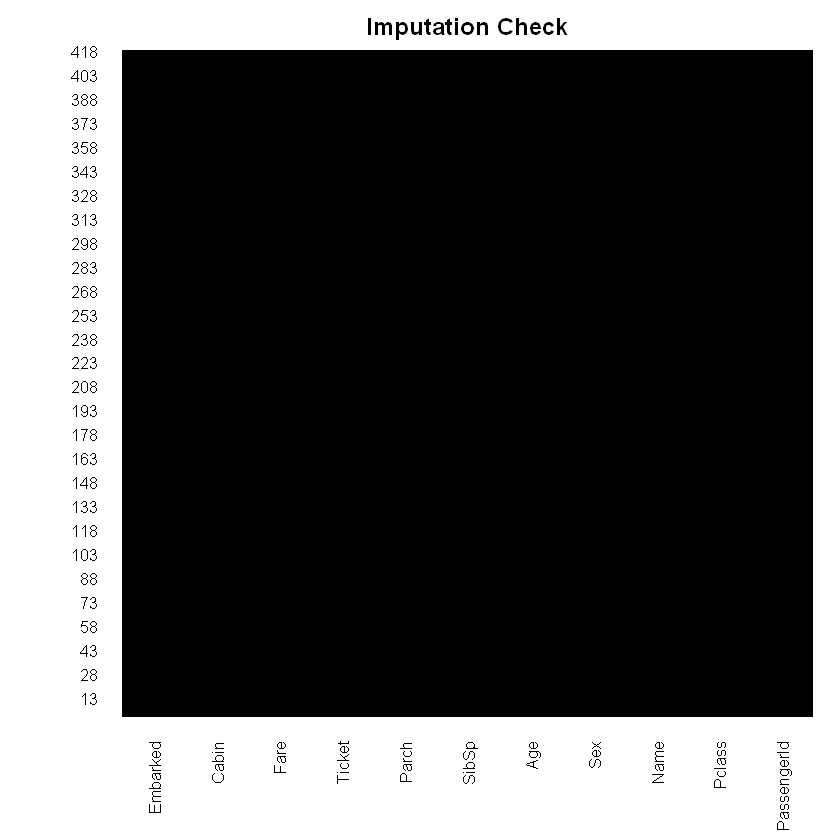

In [24]:
missmap(df.test,main = 'Imputation Check', col = c('Yellow', 'Black'),legend = F)

So, now there are no missing values in the data set and we move on to further data cleaning. Note that, we used the same fucntion for imputing the fare data as the fare quite naturally depends on the class of the passenger.

#### Data Cleaning

In [25]:
df.test<-select(df.test,-PassengerId,-Name,-Ticket,-Cabin)
head(df.test)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
,<int>,<chr>,<dbl>,<int>,<int>,<dbl>,<chr>
1,3,male,34.5,0,0,7.8292,Q
2,3,female,47.0,1,0,7.0000,S
3,2,male,62.0,0,0,9.6875,Q
4,3,male,27.0,0,0,8.6625,S
5,3,female,22.0,1,1,12.2875,S
6,3,male,14.0,0,0,9.2250,S


As we did in the training set, we remove the fetures that we did not use for prediction in the test data.

In [26]:
df.test$Pclass<-factor(df.test$Pclass)
df.test$SibSp<-factor(df.test$SibSp)
df.test$Embarked<-factor(df.test$Embarked)
df.test$Sex<-factor(df.test$Sex)

We again convert these features into factors as these were classified as factors in our model too.

In [27]:
str(df.test)

'data.frame':	418 obs. of  7 variables:
 $ Pclass  : Factor w/ 3 levels "1","2","3": 3 3 2 3 3 3 3 2 3 3 ...
 $ Sex     : Factor w/ 2 levels "female","male": 2 1 2 2 1 2 1 2 1 2 ...
 $ Age     : num  34.5 47 62 27 22 14 30 26 18 21 ...
 $ SibSp   : Factor w/ 7 levels "0","1","2","3",..: 1 2 1 1 2 1 1 2 1 3 ...
 $ Parch   : int  0 0 0 0 1 0 0 1 0 0 ...
 $ Fare    : num  7.83 7 9.69 8.66 12.29 ...
 $ Embarked: Factor w/ 3 levels "C","Q","S": 2 3 2 3 3 3 2 3 1 3 ...


In [28]:
fitted.probabilities<-predict(log.model,df.test,type = 'response')
fitted.results<-ifelse(fitted.probabilities>0.5,1,0)

We fit the probabilities of the certain passenger by using the predict function and a logistic regression model and then classify them into Survived ot Not by choosing 0.5 probability as the cutoff point.

## Exporting the Predictions

In [29]:
df.test<-read.csv('test.csv')
results<-cbind(df.test$PassengerId,fitted.results)
colnames(results)<-c('PassengerId','Survived')
head(results)

,PassengerId,Survived
1,892,0
2,893,0
3,894,0
4,895,0
5,896,1
6,897,0


In [30]:
write.csv(results,file = 'Results.csv',row.names = F)